# **Predição de secas usando dados de solo e clima.**

## **Introdução:**

A predição de secas é um problema crítico em muitas partes do mundo, pois as secas podem causar impactos devastadores na agricultura, no abastecimento de água e no meio ambiente. Portanto, é fundamental entendermos como antecipar a ocorrência de secas, permitindo a implementação de medidas preventivas e o planejamento adequado.

Os dados de solo e clima desempenham um papel fundamental na compreensão e predição de secas. As características do solo, como o teor de umidade, a textura e a composição química, afetam diretamente a capacidade do solo de reter água e suportar a vegetação. Além disso, as condições climáticas, como a precipitação, a temperatura e a umidade do ar, têm um impacto direto na quantidade de água disponível no solo.

Ao utilizar um dataset que combina dados de solo e clima, podemos desenvolver modelos de machine learning mais robustos e precisos. Esses modelos podem capturar correlações complexas entre as variáveis ambientais e, assim, melhorar nossa capacidade de prever secas com antecedência. Além disso, a escolha desse tipo de dataset permite uma abordagem multidisciplinar, integrando conhecimentos.


In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: c:\venv\ilumpy\Scripts\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

### Importanto o dataset

In [3]:
df_validação = pd.read_csv('validation_timeseries.csv')

In [4]:
df_validation = df_validação.copy()

In [5]:
df_validation.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2017-01-01,32.50,100.02,10.47,14.69,14.47,14.47,17.68,10.53,...,14.63,2.14,2.71,1.52,1.19,4.40,5.96,2.25,3.71,NaN
1,1001,2017-01-02,63.52,100.04,12.75,17.96,17.75,17.75,20.30,16.14,...,17.85,2.75,4.31,1.60,2.71,5.50,8.16,4.05,4.11,NaN
2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,...,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
3,1001,2017-01-04,0.01,100.02,5.21,8.10,3.86,3.88,11.74,2.12,...,8.08,2.63,3.95,1.34,2.60,4.98,6.16,3.36,2.80,NaN
4,1001,2017-01-05,0.01,99.89,4.54,5.91,2.20,2.22,13.07,-0.18,...,5.85,1.76,2.76,0.47,2.28,3.43,4.70,0.66,4.04,NaN


## **Analise Exploratória**

In [6]:
df_validation.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06,323232.000000
mean,3.067038e+04,2.945218e+00,9.668289e+01,8.209934e+00,1.313680e+01,7.626656e+00,7.631953e+00,1.884739e+01,7.903998e+00,1.094340e+01,1.321793e+01,3.533742e+00,5.165298e+00,1.904352e+00,3.260947e+00,5.486969e+00,7.762958e+00,3.104674e+00,4.658297e+00,0.538601
std,1.497911e+04,6.883588e+00,5.443892e+00,4.905189e+00,1.093575e+01,1.049740e+01,1.035683e+01,1.151619e+01,1.064708e+01,3.951253e+00,1.113432e+01,1.845010e+00,2.607319e+00,1.342821e+00,1.927159e+00,2.310433e+00,2.851491e+00,2.115034e+00,2.155684e+00,0.916711
min,1.001000e+03,0.000000e+00,6.686000e+01,1.600000e-01,-3.329000e+01,-3.701000e+01,-3.358000e+01,-2.859000e+01,-3.815000e+01,2.000000e-02,-3.548000e+01,3.700000e-01,6.000000e-01,0.000000e+00,2.200000e-01,4.600000e-01,8.700000e-01,0.000000e+00,3.000000e-01,0.000000
25%,1.904450e+04,0.000000e+00,9.588000e+01,3.920000e+00,4.670000e+00,-4.400000e-01,-4.800000e-01,1.035000e+01,-4.400000e-01,8.140000e+00,4.540000e+00,2.120000e+00,3.110000e+00,9.400000e-01,1.810000e+00,3.770000e+00,5.640000e+00,1.420000e+00,3.110000e+00,0.000000
50%,2.921200e+04,1.900000e-01,9.832000e+01,7.260000e+00,1.458000e+01,8.510000e+00,8.420000e+00,2.081000e+01,8.670000e+00,1.090000e+01,1.461000e+01,3.140000e+00,4.670000e+00,1.640000e+00,2.810000e+00,5.120000e+00,7.300000e+00,2.760000e+00,4.220000e+00,0.000000
75%,4.600750e+04,2.500000e+00,9.998000e+01,1.218000e+01,2.251000e+01,1.671000e+01,1.665000e+01,2.824000e+01,1.701000e+01,1.364000e+01,2.269000e+01,4.560000e+00,6.710000e+00,2.560000e+00,4.250000e+00,6.830000e+00,9.420000e+00,4.390000e+00,5.760000e+00,1.000000
max,5.604300e+04,2.433200e+02,1.040600e+02,2.198000e+01,4.062000e+01,2.684000e+01,2.684000e+01,5.003000e+01,3.304000e+01,3.319000e+01,4.325000e+01,2.494000e+01,3.176000e+01,1.629000e+01,2.319000e+01,2.952000e+01,3.738000e+01,2.085000e+01,2.890000e+01,5.000000


### Coluna fips

In [7]:
df_validation["fips"]

0           1001
1           1001
2           1001
3           1001
4           1001
           ...  
2268835    56043
2268836    56043
2268837    56043
2268838    56043
2268839    56043
Name: fips, Length: 2268840, dtype: int64

Padrões emitidos para garantir segurança e interoperabilidade de computador em sistemas de criptografia (referente a locais dos EUA) [6]


### Coluna PRECTOT

In [8]:
df_validation["PRECTOT"]

0          32.50
1          63.52
2          18.82
3           0.01
4           0.01
           ...  
2268835     0.14
2268836     0.02
2268837     0.34
2268838     3.17
2268839     1.39
Name: PRECTOT, Length: 2268840, dtype: float64

Precipitação (mm; dia-1)

### Coluna PS

In [9]:
df_validation["PS"]

0          100.02
1          100.04
2           99.69
3          100.02
4           99.89
            ...  
2268835     82.71
2268836     83.14
2268837     82.78
2268838     81.97
2268839     83.16
Name: PS, Length: 2268840, dtype: float64

Pressão da superfície (kPa)

### Coluna QV2M

In [10]:
df_validation["QV2M"]

0          10.47
1          12.75
2           9.74
3           5.21
4           4.54
           ...  
2268835     1.54
2268836     1.32
2268837     1.75
2268838     2.72
2268839     1.03
Name: QV2M, Length: 2268840, dtype: float64

Humidade específica a 2 metros (g/kg)

### Coluna T2M

In [11]:
df_validation["T2M"]

0          14.69
1          17.96
2          14.24
3           8.10
4           5.91
           ...  
2268835    -9.57
2268836   -11.25
2268837    -7.17
2268838    -2.84
2268839   -13.02
Name: T2M, Length: 2268840, dtype: float64

Temperatura a 2 metros (C)

### Coluna T2MDEW

In [12]:
df_validation["T2MDEW"]

0          14.47
1          17.75
2          13.44
3           3.86
4           2.20
           ...  
2268835   -14.20
2268836   -15.98
2268837   -12.62
2268838    -7.14
2268839   -18.93
Name: T2MDEW, Length: 2268840, dtype: float64

Ponto de orvalho a 2 metros (C)

### Coluna T2MWET

In [13]:
df_validation["T2MWET"]

0          14.47
1          17.75
2          13.44
3           3.88
4           2.22
           ...  
2268835   -13.09
2268836   -14.57
2268837   -12.17
2268838    -6.95
2268839   -16.97
Name: T2MWET, Length: 2268840, dtype: float64

Temperatura do termômetro Wet Bulb a 2 metros (C)


### Coluna T2M_MAX

In [14]:
df_validation["T2M_MAX"]

0          17.68
1          20.30
2          18.48
3          11.74
4          13.07
           ...  
2268835    -6.23
2268836    -7.03
2268837     0.64
2268838     2.14
2268839    -9.70
Name: T2M_MAX, Length: 2268840, dtype: float64

Temperatura máxima a 2 metros (C)

### Coluna T2M_MIN

In [15]:
df_validation["T2M_MIN"]

0          10.53
1          16.14
2           9.29
3           2.12
4          -0.18
           ...  
2268835   -12.06
2268836   -14.33
2268837   -14.85
2268838    -8.49
2268839   -16.67
Name: T2M_MIN, Length: 2268840, dtype: float64

Temperatura mínima a 2 metros (C)

### Coluna T2M_RANGE

In [16]:
df_validation["T2M_RANGE"]

0           7.15
1           4.16
2           9.20
3           9.62
4          13.24
           ...  
2268835     5.82
2268836     7.30
2268837    15.50
2268838    10.62
2268839     6.96
Name: T2M_RANGE, Length: 2268840, dtype: float64

Faixa de temperatura a 2 metros (C)

### Coluna TS

In [17]:
df_validation["TS"]

0          14.63
1          17.85
2          14.06
3           8.08
4           5.85
           ...  
2268835   -10.10
2268836   -12.36
2268837    -8.09
2268838    -3.63
2268839   -13.06
Name: TS, Length: 2268840, dtype: float64

Temperatura da crosta da Terra (C)

### Coluna WS10M

In [18]:
df_validation["WS10M"]

0          2.14
1          2.75
2          2.25
3          2.63
4          1.76
           ... 
2268835    2.01
2268836    1.66
2268837    3.64
2268838    5.26
2268839    4.53
Name: WS10M, Length: 2268840, dtype: float64

Velocidade do vento a 10 metros (m/s)

### Coluna WS10M_MAX

In [19]:
df_validation["WS10M_MAX"]

0           2.71
1           4.31
2           3.73
3           3.95
4           2.76
           ...  
2268835     3.56
2268836     3.12
2268837     4.71
2268838    11.19
2268839     9.66
Name: WS10M_MAX, Length: 2268840, dtype: float64

Velocidade do vento máxima a 10 metros (m/s)

### Coluna WS10M_MIN

In [20]:
df_validation["WS10M_MIN"]

0          1.52
1          1.60
2          1.64
3          1.34
4          0.47
           ... 
2268835    0.23
2268836    0.09
2268837    2.47
2268838    1.70
2268839    0.82
Name: WS10M_MIN, Length: 2268840, dtype: float64

Velocidade do vento mínima a 10 metros (m/s)

### Coluna WS10M_RANGE

In [21]:
df_validation["WS10M_RANGE"]

0          1.19
1          2.71
2          2.09
3          2.60
4          2.28
           ... 
2268835    3.33
2268836    3.04
2268837    2.24
2268838    9.49
2268839    8.84
Name: WS10M_RANGE, Length: 2268840, dtype: float64

Faixa de velocidade do vento a 10 metros (m/s)

### Coluna WS50M

In [22]:
df_validation["WS50M"]

0          4.40
1          5.50
2          4.80
3          4.98
4          3.43
           ... 
2268835    2.67
2268836    2.40
2268837    5.58
2268838    7.56
2268839    5.51
Name: WS50M, Length: 2268840, dtype: float64

Velocidade do vento a 50 metros (m/s)

### Coluna WS50M_MAX

In [23]:
df_validation["WS50M_MAX"]

0           5.96
1           8.16
2           7.27
3           6.16
4           4.70
           ...  
2268835     4.70
2268836     5.58
2268837     7.61
2268838    13.59
2268839    11.90
Name: WS50M_MAX, Length: 2268840, dtype: float64

 Velocidade do vento máxima a 50 metros (m/s)

### Coluna WS50M_MIN

In [24]:
df_validation["WS50M_MIN"]

0          2.25
1          4.05
2          2.54
3          3.36
4          0.66
           ... 
2268835    0.28
2268836    0.08
2268837    4.15
2268838    3.11
2268839    0.96
Name: WS50M_MIN, Length: 2268840, dtype: float64

Velocidade do vento mínima a 50 metros (m/s)

### Coluna WS50M_RANGE

In [25]:
df_validation["WS50M_RANGE"]

0           3.71
1           4.11
2           4.72
3           2.80
4           4.04
           ...  
2268835     4.42
2268836     5.50
2268837     3.46
2268838    10.49
2268839    10.94
Name: WS50M_RANGE, Length: 2268840, dtype: float64

Faixa de velocidade do vento a 50 metros (m/s)

### Coluna score

In [26]:
df_validation["score"]

0          NaN
1          NaN
2          2.0
3          NaN
4          NaN
          ... 
2268835    NaN
2268836    NaN
2268837    NaN
2268838    NaN
2268839    NaN
Name: score, Length: 2268840, dtype: float64

Medidas de seca (0-5; a cada 7 dias)

## **Trabalhando com o dataset.**

### Correção de dados

In [27]:
df_validation.isnull().sum()    # Verificando se há valores NaN e quantos são.

fips                 0
date                 0
PRECTOT              0
PS                   0
QV2M                 0
T2M                  0
T2MDEW               0
T2MWET               0
T2M_MAX              0
T2M_MIN              0
T2M_RANGE            0
TS                   0
WS10M                0
WS10M_MAX            0
WS10M_MIN            0
WS10M_RANGE          0
WS50M                0
WS50M_MAX            0
WS50M_MIN            0
WS50M_RANGE          0
score          1945608
dtype: int64

In [28]:
df_validation = df_validation.dropna()  # Retirando os valores nulos.

In [29]:
df_validation['fips'].nunique()    # Quantos valores unicos a coluna fips possui.

3108

### Analisando e definido algumas variaveis.

In [30]:
#Tranformação da coluna 'date' em três outras, categoricas: Day, month e year.
df_validation['year'] = pd.DatetimeIndex(df_validation['date']).year
df_validation['month'] = pd.DatetimeIndex(df_validation['date']).month
df_validation['day'] = pd.DatetimeIndex(df_validation['date']).day
df_validation['score'] = df_validation['score'].round().astype(int)        #Arredondando o valor do score para inteiros, para que se possa assim, trabalhar com classes ao invés de ints. .

In [31]:
df_validation = df_validation.drop('fips', 1)   # Como a coluna "fips" indica condados dos EUA e queremos traçar relações entre indicadores climaticos, retiraremos essa coluna.
df_validation = df_validation.drop('date', 1)   # A coluna "date" já está sendo contemplada nas 3 novas colunas criadas "year","month" e "day"

C:\Users\daniel23020\AppData\Local\Temp\ipykernel_9448\495008246.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_validation = df_validation.drop('fips', 1)   # Como a coluna "fips" indica condados dos EUA e queremos traçar relações entre indicadores climaticos, retiraremos essa coluna.
C:\Users\daniel23020\AppData\Local\Temp\ipykernel_9448\495008246.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_validation = df_validation.drop('date', 1)   # A coluna "date" já está sendo contemplada nas 3 novas colunas criadas "year","month" e "day"


,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
2,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,...,1.64,2.09,4.80,7.27,2.54,4.72,2,2017,1,3
9,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,...,2.52,1.72,6.19,7.55,4.68,2.86,2,2017,1,10
16,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,...,1.71,1.90,4.93,5.90,2.76,3.15,2,2017,1,17
23,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,...,1.03,1.31,3.52,6.49,1.47,5.02,1,2017,1,24
30,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,...,1.76,1.24,5.00,7.40,2.88,4.52,1,2017,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268805,0.21,82.62,2.88,-0.63,-6.30,-6.25,5.40,-5.43,10.83,-1.94,...,2.93,2.51,6.21,9.43,4.63,4.80,0,2018,11,27
2268812,0.01,83.32,1.47,-7.66,-14.71,-13.42,-1.41,-11.86,10.45,-8.96,...,2.20,3.03,4.82,6.46,3.79,2.67,0,2018,12,4
2268819,0.06,82.94,2.12,-3.04,-10.21,-9.60,2.45,-6.68,9.13,-4.08,...,2.07,3.01,5.69,8.44,3.42,5.01,0,2018,12,11
2268826,0.06,82.77,3.09,0.69,-5.36,-5.17,5.77,-4.12,9.89,-1.31,...,2.04,2.65,5.79,7.52,3.47,4.05,0,2018,12,18


### Verificando e retirando valores anomalos

In [32]:
def anomalos(df):
  """
    Essa função tem o objetivo e a capacidade de retirar outlayers de um data set, isso se dá a partir da comparação dos pontos com a media e uma relação com o desvio padrão.

    Parâmetros:
    - df (dataframe): Um dataframe no qual se queira identificar e retira valores anomalos.

    Retorna:
    - return: dataframe com valores anomalos retirados.
  """
  for a in df.columns:
      df = df[(df[a] <= df[a].mean() + 3*df[a].std()) &
              (df[a] >= df[a].mean() - 3*df[a].std())]
  return df

In [33]:
df_validation = anomalos(df_validation)  #Aplicando a função que retira os valores anomalos. 

In [34]:
df_validation.describe()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,...,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000,286540.000000
mean,2.218883,97.329376,8.580194,13.860945,8.536013,8.544162,19.531924,8.673579,10.858362,13.928534,...,1.784658,2.986916,5.197298,7.343476,2.950241,4.393241,0.461681,2017.503678,6.553623,16.062389
std,4.204751,4.312552,4.922092,10.637828,10.234811,10.093393,11.161100,10.388365,3.751399,10.825962,...,1.134162,1.613224,2.026879,2.417383,1.897161,1.811895,0.801720,0.499987,3.405453,8.730150
min,0.000000,80.260000,0.490000,-18.930000,-23.020000,-21.350000,-14.740000,-23.200000,0.160000,-19.010000,...,0.000000,0.220000,0.660000,1.200000,0.010000,0.480000,0.000000,2017.000000,1.000000,1.000000
25%,0.000000,96.380000,4.180000,5.600000,0.650000,0.610000,11.510000,0.370000,8.190000,5.460000,...,0.920000,1.720000,3.650000,5.490000,1.400000,3.030000,0.000000,2017.000000,4.000000,9.000000
50%,0.180000,98.470000,7.940000,15.590000,9.930000,9.850000,21.730000,9.730000,10.810000,15.635000,...,1.600000,2.620000,4.930000,7.040000,2.700000,4.090000,0.000000,2018.000000,7.000000,16.000000
75%,2.230000,100.090000,12.650000,22.990000,17.350000,17.300000,28.490000,17.620000,13.420000,23.140000,...,2.460000,3.960000,6.520000,8.990000,4.210000,5.490000,1.000000,2018.000000,10.000000,24.000000
max,22.680000,104.010000,20.800000,40.110000,25.960000,25.960000,50.030000,31.200000,22.400000,42.210000,...,5.570000,8.510000,11.500000,14.860000,8.670000,10.100000,3.000000,2018.000000,12.000000,31.000000


### Seleção de atributos por Analise de multicolinearidade


In [35]:
def selecao_vif(df_atributos, limiar_vif):
    """Realiza a seleção de atributos por VIF.

    Args:
      df_atributos: DataFrame contendo os atributos.
      limiar_vf: valor do limiar do vif. Número positivo. Usualmente é 5 ou 10.

    Returns:
      DataFrame com os atributos selecionados.
    """

    df = df_atributos.copy()

    while True:
        VIFs = []

        for col in df.columns:
            X = df.drop(col, axis=1).values
            y = df[col].values

            r_quadrado = LinearRegression().fit(X, y).score(X, y)

            if r_quadrado != 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_maximo = max(VIFs)

        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)
        else:
            break

    return df

In [36]:
df_selection_vif = selecao_vif(df_validation, 5)  #Aplicando a seleção VIF, retirando os atributos que apresentam comportamente "Semelhante". (mesma variância)

In [37]:
df_selection_vif = df_selection_vif.dropna() #Retirando novamente valores nulos. Apenas uma boa pratica

In [38]:
df_selection_vif.columns

Index(['PRECTOT', 'PS', 'T2M_RANGE', 'TS', 'WS10M_MIN', 'WS10M_RANGE',
       'WS50M_RANGE', 'score', 'year', 'month', 'day'],
      dtype='object')

### Realizando o PCA

#### PCA sem Seleção VIF

[None]

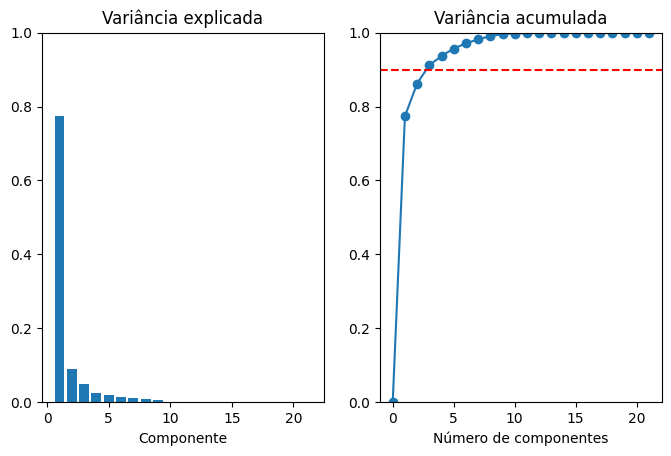

In [39]:
X = df_validation.drop('score', axis=1)
y = df_validation["score"]

pca = PCA()

pca.fit(X)

autovalores = pca.explained_variance_
autovetores = pca.components_.T

variancia_explicada = pca.explained_variance_ratio_


id_componentes = np.arange(1, pca.n_components_ + 1)

figura, eixos = plt.subplots(1, 2)

# Plot variância explicada
eixos[0].bar(id_componentes, variancia_explicada)
eixos[0].set(xlabel="Componente", title="Variância explicada", ylim=(0.0, 1.0))

# Plot variância acumulada
cv = np.cumsum(pca.explained_variance_ratio_)
eixos[1].plot(np.r_[0, id_componentes], np.r_[0, cv], marker="o")
eixos[1].set(
    xlabel="Número de componentes",
    title="Variância acumulada",
    ylim=(0.0, 1.0),
)
eixos[1].axhline(0.9, linestyle="--", color="red")

figura.set(figwidth=8)

Apartir da analise de componentes principais acima, vemos que em nesse dataset, no qual não foi realizado um seleção VIF, foram indicados que 5 componentes seriam suficientes pra que seja analisado parte significativa da informação que esse dataset carrega. Porém em nossos testes, vimos que utilizar as 7 componentes principais proporcionava uma melhor acuracia.

In [40]:
n_componentes_pca = 7  #Definindoo o numero de componentes principais. 

#### PCA com Seleção VIF

[None]

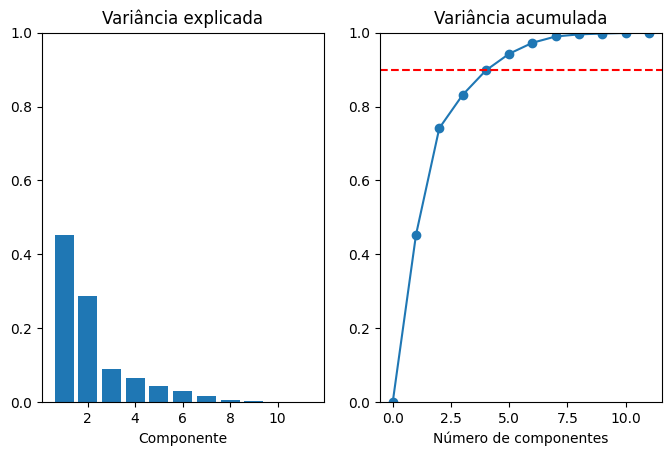

In [41]:
X = df_selection_vif
y = df_validation["score"]

pca_selection = PCA()

pca_selection.fit(X)

autovalores = pca_selection.explained_variance_
autovetores = pca_selection.components_.T

variancia_explicada = pca_selection.explained_variance_ratio_


id_componentes = np.arange(1, pca_selection.n_components_ + 1)

figura, eixos = plt.subplots(1, 2)

# Plot variância explicada
eixos[0].bar(id_componentes, variancia_explicada)
eixos[0].set(xlabel="Componente", title="Variância explicada", ylim=(0.0, 1.0))

# Plot variância acumulada
cv = np.cumsum(pca_selection.explained_variance_ratio_)
eixos[1].plot(np.r_[0, id_componentes], np.r_[0, cv], marker="o")
eixos[1].set(
    xlabel="Número de componentes",
    title="Variância acumulada",
    ylim=(0.0, 1.0),
)
eixos[1].axhline(0.9, linestyle="--", color="red")

figura.set(figwidth=8)

Já no PCA realizado acima podemos ver que, nesse dataset que passou previamente por uma seleção VIF, somente 5 componentes foram indicados como suficientes.  

In [42]:
n_componentes_selecao_pca = 5

## **Definindo treino e teste.**

In [43]:
df_selection_vif

,PRECTOT,PS,T2M_RANGE,TS,WS10M_MIN,WS10M_RANGE,WS50M_RANGE,score,year,month,day
2,18.82,99.69,9.20,14.06,1.64,2.09,4.72,2,2017,1,3
9,0.02,101.13,14.79,5.81,2.52,1.72,2.86,2,2017,1,10
16,0.14,100.60,9.88,17.10,1.71,1.90,3.15,2,2017,1,17
23,0.00,99.72,12.06,8.95,1.03,1.31,5.02,1,2017,1,24
30,0.00,100.37,15.24,11.32,1.76,1.24,4.52,1,2017,1,31
...,...,...,...,...,...,...,...,...,...,...,...
2268805,0.21,82.62,10.83,-1.94,2.93,2.51,4.80,0,2018,11,27
2268812,0.01,83.32,10.45,-8.96,2.20,3.03,2.67,0,2018,12,4
2268819,0.06,82.94,9.13,-4.08,2.07,3.01,5.01,0,2018,12,11
2268826,0.06,82.77,9.89,-1.31,2.04,2.65,4.05,0,2018,12,18


### Treino e teste com seleção VIF


In [44]:
df_selection_vif.columns

Index(['PRECTOT', 'PS', 'T2M_RANGE', 'TS', 'WS10M_MIN', 'WS10M_RANGE',
       'WS50M_RANGE', 'score', 'year', 'month', 'day'],
      dtype='object')

In [45]:
FEATURES = ['PRECTOT', 'PS', 'T2M_RANGE', 'TS', 'WS10M_MIN', 'WS10M_RANGE',
            'WS50M_RANGE', 'year', 'month', 'day']
TARGET = ["score"]

df_selection_vif = df_selection_vif.reindex(FEATURES + TARGET, axis=1)


TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

indices = df_selection_vif.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df_selection_vif.loc[indices_treino]
df_teste = df_selection_vif.loc[indices_teste]

X_treino_vif = df_treino.reindex(FEATURES, axis=1).values
y_treino_vif = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste_vif = df_teste.reindex(FEATURES, axis=1).values
y_teste_vif = df_teste.reindex(TARGET, axis=1).values.ravel()

### Treino e Teste sem seleção VIF

In [46]:
df_validation.columns

Index(['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score', 'year', 'month', 'day'],
      dtype='object')

In [47]:
FEATURES = ['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'year', 'month', 'day']
TARGET = ["score"]

df_validation = df_validation.reindex(FEATURES + TARGET, axis=1)



TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

indices = df_validation.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df_validation.loc[indices_treino]
df_teste = df_validation.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

## **Modelos de Predição**


### Modelo KNN

#### KNN só PCA

###### Redimensionando por PCA:

In [124]:
X = df_validation.drop('score', axis=1)
n_componentes = 7

pca = PCA(n_componentes)

pca.fit(X)      #Aplicando o PCA no dataset sem o VIF.

X_treino_pca = pca.transform(X_treino)
X_teste_pca = pca.transform(X_teste)

c:\venv\ilumpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\venv\ilumpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


##### Validação Cruzada

In [125]:
NUM_FOLDS = 7

espaco_de_busca = {
    'n_neighbors': [1, 3, 5,7,9,11],
}

modelo_KNN = KNeighborsClassifier()

buscador = GridSearchCV(
    modelo_KNN,
    espaco_de_busca,
    cv=NUM_FOLDS,
    scoring="accuracy",
)

buscador.fit(X_treino_pca, y_treino)          #Encontrando os hiperparâmetros para o KNN de acordo com o nosso dataset.

print(buscador.best_params_)

n_neighbors = buscador.best_params_["n_neighbors"]


{'n_neighbors': 1}


##### Modelo só PCA:

In [132]:
n_neighbors = 1

pipeline = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
])

pipeline.fit(X_treino_pca, y_treino)

y_predito = pipeline.predict(X_teste_pca)

score = pipeline.score(X_teste_pca, y_teste)

print("Score do modelo:", score)


Score do modelo: 0.8236197389544218


#### KNN só Seleção VIF

##### Modelo só Seleção VIF

In [127]:
pipeline = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
])

pipeline.fit(X_treino_vif, y_treino)

y_predito = pipeline.predict(X_teste_vif)

score = pipeline.score(X_teste_vif, y_teste)

print()
print("Score do modelo:", score)


Score do modelo: 0.8283311230543728


#### KNN Seleção VIF e PCA

##### Redimendionando por PCA:

In [133]:
X = df_selection_vif.drop('score', 1)
y = df_validation["score"]

n_componentes_selecao_pca = 5

pca = PCA(n_componentes_selecao_pca)

pca.fit(X)

X_treino_pca_vif = pca.transform(X_treino_vif)
X_teste_pca_vif = pca.transform(X_teste_vif)

C:\Users\daniel23020\AppData\Local\Temp\ipykernel_14620\3251426713.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_selection_vif.drop('score', 1)
c:\venv\ilumpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\venv\ilumpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


##### Modelo com PCA e Seleção VIF

In [134]:
pipeline = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
])

pipeline.fit(X_treino_pca_vif, y_treino)

y_predito = pipeline.predict(X_teste_pca_vif,)

score = pipeline.score(X_teste_pca_vif, y_teste)

print()
print("Score do modelo:", score)
print()


Score do modelo: 0.8121728205486145



### Modelo Arvore Decisão

#### Arvore com PCA:

##### Redimensionando por PCA:

In [56]:
X = df_validation.drop('score', axis=1)
y = df_validation['score']

pca = PCA(n_componentes_pca)

pca.fit(X)

X_treino_pca = pca.transform(X_treino)
X_teste_pca = pca.transform(X_teste)

c:\venv\ilumpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\venv\ilumpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


##### Validação Cruzada:

In [57]:
NUM_FOLDS = 5

espaco_de_busca = {
    "max_depth": [None, 2, 3, 5, 7, 10],
    "min_samples_split": [1, 2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
}


modelo_DTC = DecisionTreeClassifier()

buscador = GridSearchCV(
    modelo_DTC,
    espaco_de_busca,
    cv=NUM_FOLDS,
    scoring="accuracy",
    refit=True,  # reajusta o melhor modelo com todos os dados de treino
    n_jobs=4,
)

buscador.fit(X_treino_pca, y_treino)

vertice_folha = buscador.best_params_["min_samples_leaf"]
vertice_condicional = buscador.best_params_["min_samples_split"]
n_profundidade = buscador.best_params_["max_depth"]

c:\venv\ilumpy\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\venv\ilumpy\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\venv\ilumpy\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\venv\ilumpy\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py", line 1480, in check_scalar
    raise ValueError(
Va

##### Modelo de Predição só com PCA

In [136]:
modelo_DTC = DecisionTreeClassifier(
        min_samples_split=vertice_condicional,
        min_samples_leaf=vertice_folha,
        max_depth=n_profundidade,
        criterion= "gini",
        splitter= "best",
        random_state=SEMENTE_ALEATORIA,
    )

modelo_DTC.fit(X_treino_pca,y_treino)


score = modelo_DTC.score(X_teste_pca, y_teste)

print()
print("Score do modelo:", score)


Score do modelo: 0.7937111747051022


#### Arvore com Seleção VIF

##### Validação Cruzada

In [138]:
NUM_FOLDS = 5

espaco_de_busca = {
    "max_depth": [None, 2, 3, 5, 7, 10],
    "min_samples_split": [1, 2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
}


modelo_DTC = DecisionTreeClassifier()

buscador = GridSearchCV(
    modelo_DTC,
    espaco_de_busca,
    cv=NUM_FOLDS,
    scoring="accuracy",
    refit=True,  # reajusta o melhor modelo com todos os dados de treino
    n_jobs=4,
)

buscador.fit(X_treino_vif, y_treino_vif)

vertice_folha = buscador.best_params_["min_samples_leaf"]
vertice_condicional = buscador.best_params_["min_samples_split"]
n_profundidade = buscador.best_params_["max_depth"]

c:\venv\ilumpy\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\venv\ilumpy\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\venv\ilumpy\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\venv\ilumpy\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py", line 1480, in check_scalar
    raise ValueError(
Va

##### Modelo de Predição só com VIF:

In [139]:
modelo_DTC = DecisionTreeClassifier(
        min_samples_split=vertice_condicional,
        min_samples_leaf=vertice_folha,
        max_depth=n_profundidade,
        criterion= "gini",
        splitter= "best",
        random_state=SEMENTE_ALEATORIA,
    )

modelo_DTC.fit(X_treino_vif, y_treino_vif)



score = modelo_DTC.score(X_teste_vif, y_teste)

print()
print("Score do modelo:", score)


Score do modelo: 0.8020171703776087


#### Arvore com PCA e Seleção VIF

##### Redimensionando por PCA:

In [140]:
X = df_selection_vif.drop('score', axis=1)
y = df_selection_vif['score']

pca = PCA(n_componentes_pca)

pca.fit(X)

X_treino_vif_pca = pca.transform(X_treino_vif)
X_teste_vif_pca = pca.transform(X_teste_vif)

c:\venv\ilumpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\venv\ilumpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


##### Validação Cruzado:

In [62]:
NUM_FOLDS = 5

espaco_de_busca = {
    "max_depth": [None, 2, 3, 5, 7, 10],
    "min_samples_split": [1, 2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
}


modelo_DTC = DecisionTreeClassifier()

buscador = GridSearchCV(
    modelo_DTC,
    espaco_de_busca,
    cv=NUM_FOLDS,
    scoring="accuracy",
    refit=True,  # reajusta o melhor modelo com todos os dados de treino
    n_jobs=4,
)

buscador.fit(X_treino_vif_pca, y_treino_vif)

vertice_folha = buscador.best_params_["min_samples_leaf"]
vertice_condicional = buscador.best_params_["min_samples_split"]
n_profundidade = buscador.best_params_["max_depth"]

c:\venv\ilumpy\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\venv\ilumpy\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\venv\ilumpy\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\venv\ilumpy\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py", line 1480, in check_scalar
    raise ValueError(
Va

##### Modelo de Predição com PCA e VIF

In [141]:
modelo_DTC = DecisionTreeClassifier(
        min_samples_split=vertice_condicional,
        min_samples_leaf=vertice_folha,
        max_depth=n_profundidade,
        criterion= "gini",
        splitter= "best",
        random_state=SEMENTE_ALEATORIA,
    )

modelo_DTC.fit(X_treino_vif_pca, y_treino_vif)

score = modelo_DTC.score(X_teste_vif_pca, y_teste_vif)

print()
print("Score do modelo:", score)


Score do modelo: 0.7878481189362742


### Modelo Floresta Aleatória.

#### Floresta só com PCA

##### Realizando o Resampling

In [67]:
X = df_validation.drop('score', axis=1)
y = df_validation['score']


smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
# Aplica o SMOTE apenas no conjunto de treinamento
X_treino_SMOTE, y_treino_SMOTE = smote.fit_resample(X_treino, y_treino)

<Figure size 1000x4000 with 0 Axes>

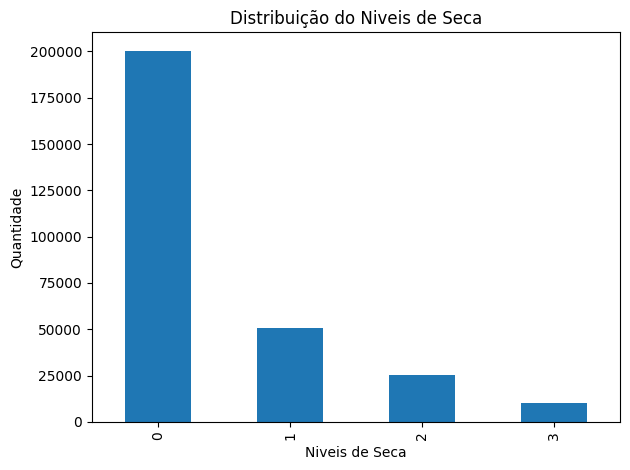

In [59]:
plt.figure(figsize=(10,40))
plt.figure()
df_validation['score'].value_counts().plot(kind = 'bar')
x_name = 'Niveis de Seca'
y_name = 'Quantidade'
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title('Distribuição do {x_name}'.format(x_name=x_name))
plt.tight_layout()

In [60]:
y_SMOTE = pd.DataFrame(y_treino_SMOTE)

<Figure size 1000x4000 with 0 Axes>

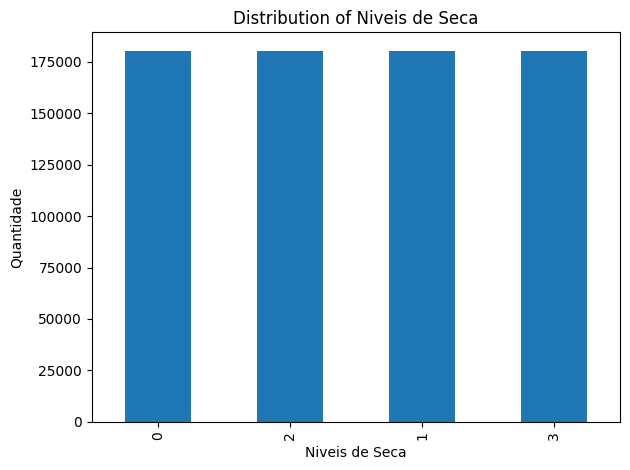

In [61]:
plt.figure(figsize=(10,40))
plt.figure()
y_SMOTE.iloc[:, 0].value_counts().plot(kind = 'bar')
x_name = 'Niveis de Seca'
y_name = 'Quantidade'
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title('Distribution of {x_name}'.format(x_name=x_name))
plt.tight_layout()

Acima podemos ver a quantidade de cada valor de cada classes em nosso dataset e que através do segundo gráfico vemos que o volume em itens de cada classe no dataset foi igualado. Isso foi realizado para analizar se esse método contribúi para a eficiencia do modelo de predição.

##### Definindo HiperParametros

In [62]:
pca_params = {'n_components': n_componentes_pca}
rfc_params = {'min_samples_split': vertice_condicional,
              'min_samples_leaf': vertice_folha,
              'max_depth': n_profundidade,
              'n_estimators': 50}

In [63]:
print(vertice_condicional, vertice_folha,n_profundidade)

3 1 None


Como vimos nos moodelos disposto anteriormente, só com PCA, ou só com Seleção VIF a validação cruzada apresenta pouca diferença.

##### PCA e Predição pelo Modelo:

In [64]:
pipeline = Pipeline([
    ('pca', PCA(**pca_params)),  # Redução de dimensionalidade com PCA
    ('rf', RandomForestClassifier(**rfc_params))  # Modelo de Floresta Aleatória
])

# Treine o modelo usando o pipeline
pipeline = pipeline.fit(X_treino, y_treino)
# Faça previsões no conjunto de teste
y_prev = pipeline.predict(X_teste)

In [65]:
pipeline2 = Pipeline([
    ('pca', PCA(**pca_params)),  # Redução de dimensionalidade com PCA
    ('rf', RandomForestClassifier(**rfc_params))  # Modelo de Floresta Aleatória
])

# Treine o modelo usando o pipeline
pipeline_smote = pipeline2.fit(X_treino_SMOTE, y_treino_SMOTE)
# Faça previsões no conjunto de teste
y_prev_smote = pipeline_smote.predict(X_teste)

In [66]:
score = pipeline.score(X_teste, y_teste)
score_smote = pipeline_smote.score(X_teste, y_teste)

print()
print("Score da Floresta Aleatória:", score)
print("Score da Floresta Aleatória com SMOTE:", score_smote)


Score da Floresta Aleatória: 0.8244224192084875
Score da Floresta Aleatória com SMOTE: 0.8298666852795421


#### Floresta só com VIF

##### Realizando o Resampling

In [48]:
X = df_selection_vif.drop('score', axis=1)
y = df_validation['score']


smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
# Aplica o SMOTE apenas no conjunto de treinamento
X_treino_vif_SMOTE, y_treino_vif_SMOTE = smote.fit_resample(X_treino_vif, y_treino_vif)

##### Modelo só com VIF:

In [77]:
pipeline = Pipeline([
    ('rf', RandomForestClassifier(**rfc_params))  # Modelo de Floresta Aleatória
])

# Treine o modelo usando o pipeline
pipeline = pipeline.fit(X_treino_vif, y_treino_vif)
# Faça previsões no conjunto de teste
y_prev = pipeline.predict(X_teste_vif)

In [93]:
pipeline2 = Pipeline([
    ('rf', RandomForestClassifier(**rfc_params))  # Modelo de Floresta Aleatória
])

# Treine o modelo usando o pipeline
pipeline_smote = pipeline2.fit(X_treino_vif_SMOTE, y_treino_vif_SMOTE)
# Faça previsões no conjunto de teste
y_prev_smote = pipeline_smote.predict(X_teste_vif)

In [95]:
score = pipeline.score(X_teste_vif, y_teste_vif)
score_smote = pipeline_smote.score(X_teste_vif, y_teste_vif)

print()
print("Score do modelo:", score)
print("Score do modelo com SMOTE:", score_smote)


Score do modelo: 0.83510155650171
Score do modelo com SMOTE: 0.8394988483283311


#### Floresta com VIF e PCA

##### Modelo com VIF e com PCA.

In [99]:
pipeline = Pipeline([
    ('pca', PCA(**pca_params)),  # Redução de dimensionalidade com PCA
    ('rf', RandomForestClassifier(**rfc_params))  # Modelo de Floresta Aleatória
])

# Treine o modelo usando o pipeline
pipeline = pipeline.fit(X_treino_vif, y_treino_vif)
# Faça previsões no conjunto de teste
y_prev = pipeline.predict(X_teste_vif)

In [100]:
pipeline2 = Pipeline([
    ('pca', PCA(**pca_params)),  # Redução de dimensionalidade com PCA
    ('rf', RandomForestClassifier(**rfc_params))  # Modelo de Floresta Aleatória
])

# Treine o modelo usando o pipeline
pipeline_smote = pipeline2.fit(X_treino_vif_SMOTE, y_treino_vif_SMOTE)
# Faça previsões no conjunto de teste
y_prev_smote = pipeline_smote.predict(X_teste_vif)

In [102]:
score = pipeline.score(X_teste_vif, y_teste_vif)
score_smote = pipeline_smote.score(X_teste_vif, y_teste_vif)

print()
print("Score do modelo:", score)
print("Score do modelo com SMOTE:", score_smote)


Score do modelo: 0.8186291617226217
Score do modelo com SMOTE: 0.8207231102114888


## Conclusão:

In [ ]:
A Conclusão para os modelos e abordagens feitos nesse notebook, estão disponibilizadas no readme. 